In [1]:
from medclip import MedCLIPModel, MedCLIPVisionModelViT, MedCLIPVisionModel

# load MedCLIP-ResNet50
model = MedCLIPModel(vision_cls=MedCLIPVisionModel)
model.from_pretrained()

# load MedCLIP-ViT
model = MedCLIPModel(vision_cls=MedCLIPVisionModelViT)
model.from_pretrained()

/opt/anaconda3/envs/medclip_eval/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/anaconda3/envs/medclip_eval/lib/python3.10/site-packages/torchvision/io/image.py:14: UserWarning: Failed to load image Python extension: 'dlopen(/opt/anaconda3/envs/medclip_eval/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: <0B7EB158-53DC-3403-8A49-22178CAB4612> /opt/anaconda3/envs/medclip_eval/lib/python3.10/site-packages/torchvision/image.so
  Reason: tried: '/opt/anaconda3/envs/medclip_eval/lib/python3.10/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/opt/anaconda3/envs/medclip_eval/lib/python3.10/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/opt/anaconda3/envs/medclip_eval/lib/python3.10/lib-dy

load model weight from: ./pretrained/medclip-resnet


Some weights of the model checkpoint at emilyalsentzer/Bio_ClinicalBERT were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


load model weight from: ./pretrained/medclip-vit


In [2]:
from medclip import MedCLIPModel, MedCLIPVisionModelViT
from medclip import MedCLIPProcessor
from medclip import PromptClassifier
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

processor = MedCLIPProcessor()
model = MedCLIPModel(vision_cls=MedCLIPVisionModelViT)
model.from_pretrained()
clf = PromptClassifier(model, ensemble=True)
clf.to(device)

# prepare input image
from PIL import Image
image = Image.open('./example_data/view1_frontal.jpg')
inputs = processor(images=image, return_tensors="pt")

# prepare input prompt texts
from medclip.prompts import generate_chexpert_class_prompts, process_class_prompts
cls_prompts = process_class_prompts(generate_chexpert_class_prompts(n=10))
inputs['prompt_inputs'] = cls_prompts

# make classification
output = clf(**inputs)
print(output)

Some weights of the model checkpoint at microsoft/swin-tiny-patch4-window7-224 were not used when initializing SwinModel: ['classifier.weight', 'classifier.bias']
- This IS expected if you are initializing SwinModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SwinModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at emilyalsentzer/Bio_ClinicalBERT were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.tra

load model weight from: ./pretrained/medclip-vit
sample 10 num of prompts for Atelectasis from total 210
sample 10 num of prompts for Cardiomegaly from total 15
sample 10 num of prompts for Consolidation from total 192
sample 10 num of prompts for Edema from total 18
sample 10 num of prompts for Pleural Effusion from total 54
{'logits': tensor([[0.3561, 0.4727, 0.1632, 0.2413, 0.3822]], grad_fn=<StackBackward0>), 'class_names': ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']}


/opt/anaconda3/envs/medclip_eval/lib/python3.10/site-packages/huggingface_hub/file_download.py:945: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


sample 10 num of prompts for Atelectasis from total 210
sample 10 num of prompts for Cardiomegaly from total 15
sample 10 num of prompts for Consolidation from total 192
sample 10 num of prompts for Edema from total 18
sample 10 num of prompts for Pleural Effusion from total 54


Some weights of the model checkpoint at microsoft/swin-tiny-patch4-window7-224 were not used when initializing SwinModel: ['classifier.weight', 'classifier.bias']
- This IS expected if you are initializing SwinModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SwinModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/opt/anaconda3/envs/medclip_eval/lib/python3.10/site-packages/transformers/modeling_utils.py:399: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorc

load model weight from: ./pretrained/medclip-vit


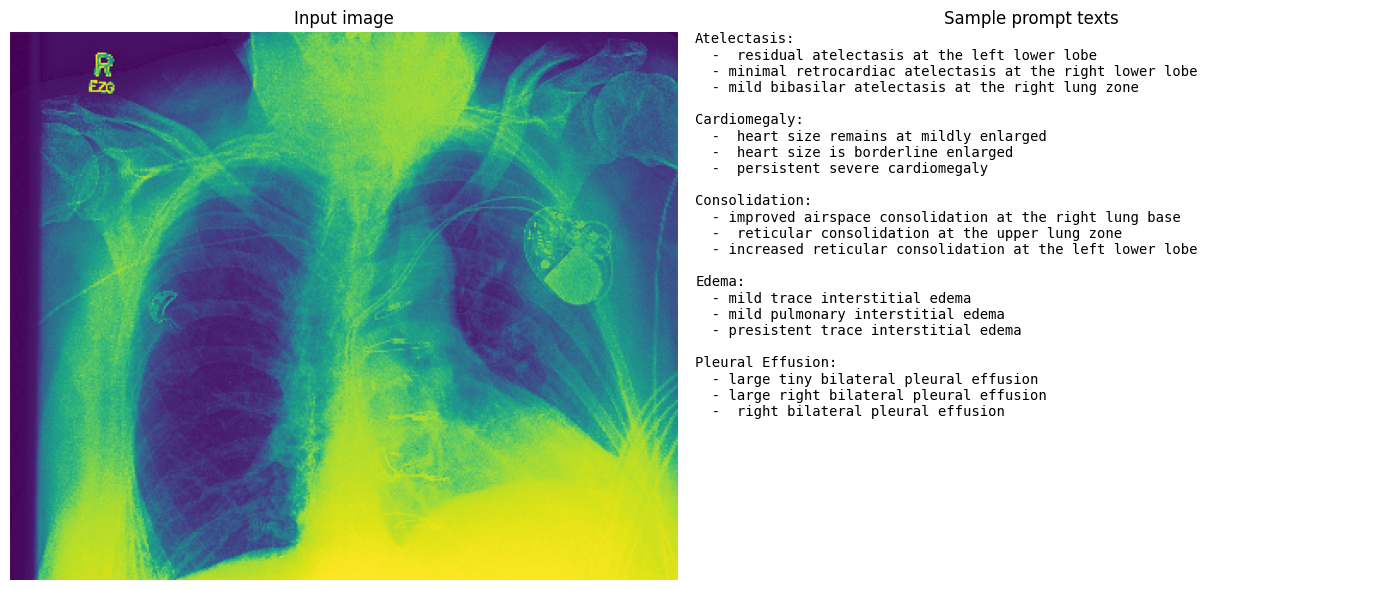

{'logits': tensor([[0.3520, 0.4752, 0.1614, 0.2409, 0.3844]], grad_fn=<StackBackward0>), 'class_names': ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']}


In [3]:
from medclip import MedCLIPModel, MedCLIPVisionModelViT, MedCLIPProcessor, PromptClassifier
from medclip.prompts import generate_chexpert_class_prompts, process_class_prompts
from PIL import Image
import torch, matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# image
image = Image.open('./example_data/view1_frontal.jpg')
processor = MedCLIPProcessor()
inputs = processor(images=image, return_tensors="pt")

# prompts: keep raw strings for display, and tokenized for the model
raw_prompts = generate_chexpert_class_prompts(n=10)
cls_prompt_inputs = process_class_prompts(raw_prompts)
inputs['prompt_inputs'] = cls_prompt_inputs

# model/classifier
model = MedCLIPModel(vision_cls=MedCLIPVisionModelViT)
model.from_pretrained()
clf = PromptClassifier(model, ensemble=True).to(device)

# visualize image + first few prompts
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].imshow(image)
axes[0].axis('off')
axes[0].set_title('Input image')

lines = []
max_per_class = 3
for cls_name, prompts in raw_prompts.items():
    lines.append(f'{cls_name}:')
    for p in prompts[:max_per_class]:
        lines.append(f'  - {p}')
    lines.append('')

axes[1].axis('off')
axes[1].set_title('Sample prompt texts')
axes[1].text(0, 1, '\n'.join(lines), va='top', fontsize=10, family='monospace')

plt.tight_layout()
plt.show()

# run classification
output = clf(**inputs)
print(output)